### 上海沪指预测

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

### 数据获取

In [19]:
df_data = pd.read_csv('./shanghai_1990-12-19_to_2019-2-28.csv')
df_data.index = pd.to_datetime(df_data['Timestamp'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6893 entries, 1990-12-19 to 2019-02-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  6893 non-null   object 
 1   Price      6893 non-null   float64
dtypes: float64(1), object(1)
memory usage: 161.6+ KB


### 可视化探索

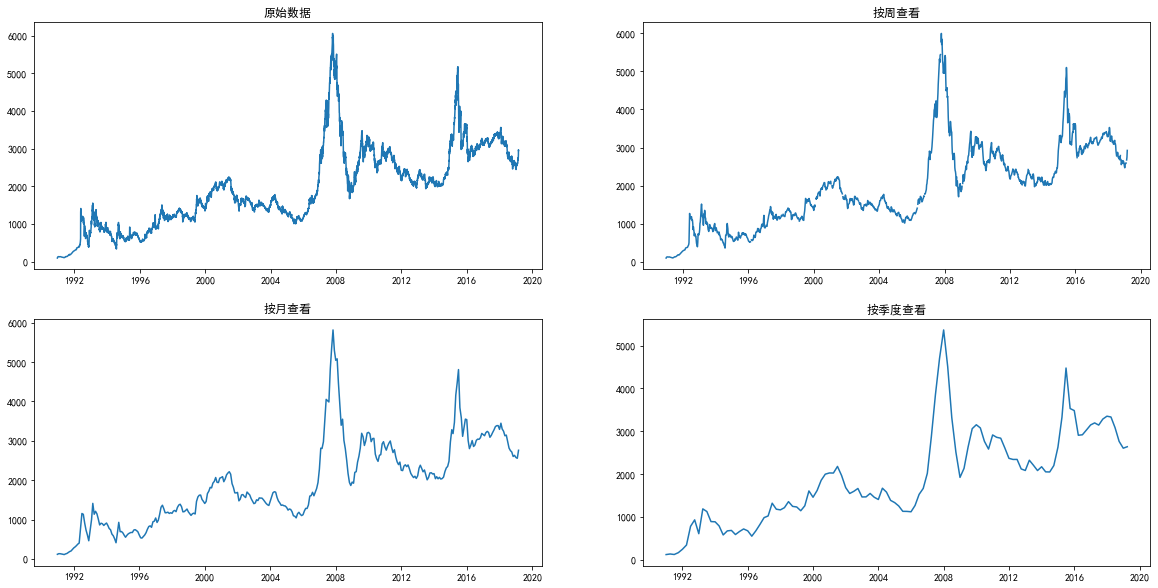

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, axes = plt.subplots(2,2)
fig.set_size_inches(20,10)
axes[0,0].plot(df_data['Price'])
axes[0,0].set_title('原始数据')
axes[0,1].plot(df_data.resample('W').mean()['Price'])
axes[0,1].set_title('按周查看')
axes[1,0].plot(df_data.resample('M').mean()['Price'])
axes[1,0].set_title('按月查看')
axes[1,1].plot(df_data.resample('Q').mean()['Price'])
axes[1,1].set_title('按季度查看')
plt.show()

* 选取按月训练数据

### 模型训练

#### ARMA模型

In [22]:
df_data_M = df_data.resample('M').mean()['Price']

In [78]:
p_q = [[x,y] for x in range(1,5) for y in range(1,5)]
min_aic = float('inf')
for p, q in p_q:
    arma = ARMA(endog=df_data_M, order=(p, q), exog=None).fit()
    if arma.aic < min_aic:
        min_aic = arma.aic
        best_arma = arma
        best_p_q = (p,q)
print('最佳ARMA模型')
print('pq值', best_p_q)
print('aic分数', min_aic)

最佳ARMA模型
pq值 (4, 3)
aic分数 4417.867047032569


#### 结果可视化查看

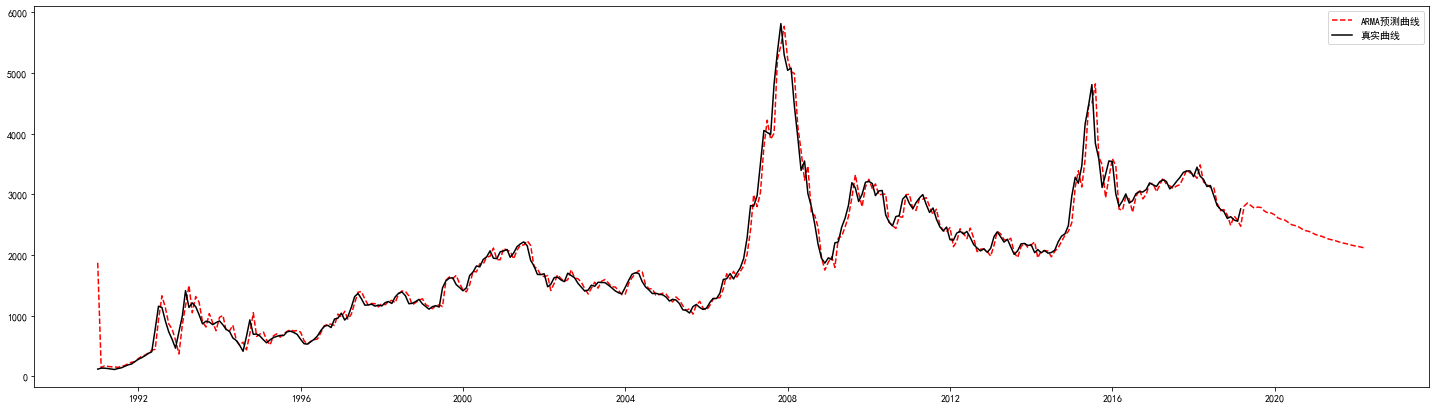

In [79]:
predict = best_arma.predict(0, len(df_data_M)+36)
fig = plt.figure(figsize=[25,7])
plt.plot(predict, color='r', linestyle='--', label='ARMA预测曲线')
plt.plot(df_data_M, color='black', label='真实曲线')
plt.legend()
plt.show()